In [9]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from langchain_ollama import ChatOllama
from typing import TypedDict


In [10]:
model = ChatOllama(model= 'qwen3:1.7b')

In [11]:
class ChatState(TypedDict):
    topic: str
    joke: str
    explaination: str

In [12]:
def generate_joke(state: ChatState) -> ChatState:
    prompt = f"Generate a joke based on the following topic {state['topic']}"
    response = model.invoke(prompt).content
    return {'joke': response}

In [ ]:
def generate_explanation(state: ChatState) -> ChatState:
    prompt = f"Generate explainaton of the following joke {state['joke']}"
    response = model.invoke(prompt).content
    return {'explanation': response}

In [14]:
checkpointer = MemorySaver() # To save the state at each superstep

graph = StateGraph(ChatState)
graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

workflow = graph.compile(checkpointer = checkpointer)



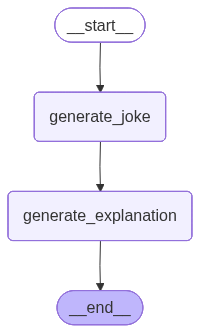

In [15]:
workflow

In [16]:
# Thread id to give specificity to each chat, that helps in unique data(chat) retrieval from database

thread_id = 11

config = {'configurable' : {'thread_id': thread_id}}

response = workflow.invoke({'topic': "The buzz around blockchain"}, config=config)

UnboundLocalError: local variable 'prompt' referenced before assignment

In [ ]:
workflow.get_state(config = config)